In [1]:
cd /data/store01/data_dirs/students/ucfafyi/Sentinel

/data/store01/data_dirs/students/ucfafyi/Sentinel


In [2]:
import sys
sys.path.insert(0, 'python')
from Dload_Finder import *
from applied import *
from fastRWpkl import *
from nicer_plot import *
from matplotlib import gridspec, colors, cm
from scipy.stats import gaussian_kde
%matplotlib inline

In [3]:
lat, lon, year = -2.1438889, -59.000, 2016
sfiles, mfiles = get_closet(lat, lon,year,0)

In [4]:
sfiles, mfiles

(array(['/home/ucfafyi/DATA/Sentinel/s_data/21/M/TT/2016/1/9/0/',
        '/home/ucfafyi/DATA/Sentinel/s_data/21/M/TT/2016/2/8/0/',
        '/home/ucfafyi/DATA/Sentinel/s_data/21/M/TT/2016/4/8/0/',
        '/home/ucfafyi/DATA/Sentinel/s_data/21/M/TT/2016/5/18/0/',
        '/home/ucfafyi/DATA/Sentinel/s_data/21/M/TT/2016/6/7/0/',
        '/home/ucfafyi/DATA/Sentinel/s_data/21/M/TT/2016/6/20/0/',
        '/home/ucfafyi/DATA/Sentinel/s_data/21/M/TT/2016/6/27/0/',
        '/home/ucfafyi/DATA/Sentinel/s_data/21/M/TT/2016/7/17/0/'], 
       dtype='|S55'),
 array([[ '/home/ucfafyi/DATA/Sentinel/m_data/MCD43A1.A2016009.h12v09.005.2016026083209.hdf',
         '/home/ucfafyi/DATA/Sentinel/m_data/MCD43A2.A2016009.h12v09.005.2016026083210.hdf'],
        [ '/home/ucfafyi/DATA/Sentinel/m_data/MCD43A1.A2016041.h12v09.005.2016104235053.hdf',
         '/home/ucfafyi/DATA/Sentinel/m_data/MCD43A2.A2016041.h12v09.005.2016104235054.hdf'],
        [ '/home/ucfafyi/DATA/Sentinel/m_data/MCD43A1.A2016097.h12v0

In [5]:
psf = parallel_rw_pkl(None, 'pre_psfs/21MTT201psfs', 'r')
psf = np.array([i[1][0] for i in psf])

In [6]:
psf

array([[  24.07245055,  291.35495072,    8.23577104,  -22.35523668,
          58.44108605],
       [  24.67300011,  306.24986917,    7.83980198,  -22.63404826,
          56.55475763],
       [  25.10590977,  307.06506377,    7.89574679,  -21.6358751 ,
          59.45758315],
       [  24.93312924,  317.94579031,    7.69150545,  -21.37678076,
          57.9544324 ],
       [  24.91427117,  318.15376314,    7.67216876,  -20.95793007,
          59.22793771],
       [  23.88038916,  313.28764429,    7.95817886,  -21.54766425,
          61.0099318 ],
       [  23.68677821,  306.94857856,    7.98405841,  -22.2861281 ,
          60.26765333]])

In [7]:
fpath, mfile = sfiles[-1], mfiles[-1]

In [8]:
data = gdal.Open(fpath+'preview.jpg').ReadAsArray()

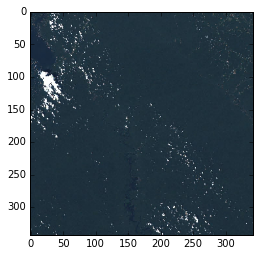

In [9]:
plt.imshow(data.T)

In [10]:
retval = applied(lat, lon, fpath, mfile, psf)


Here is the cloud probability calculation!

/home/ucfafyi/DATA/Sentinel/s_data/21/M/TT/2016/7/17/0/ (2, 3, 4, 8, 11, 12, 13)
7%
14%
21%
29%
36%
43%
50%
57%
64%
71%
79%
86%
93%
99%
Done!!!
DOY:  201 
Location:  21MTT
Cloud proportion:  0.0124569510386


In [11]:
to_reg = [[np.array(i[1]), np.array(i[2])] for i in retval]

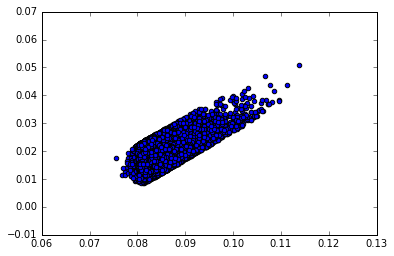

In [20]:
plt.scatter(to_reg[0][0], to_reg[0][1])

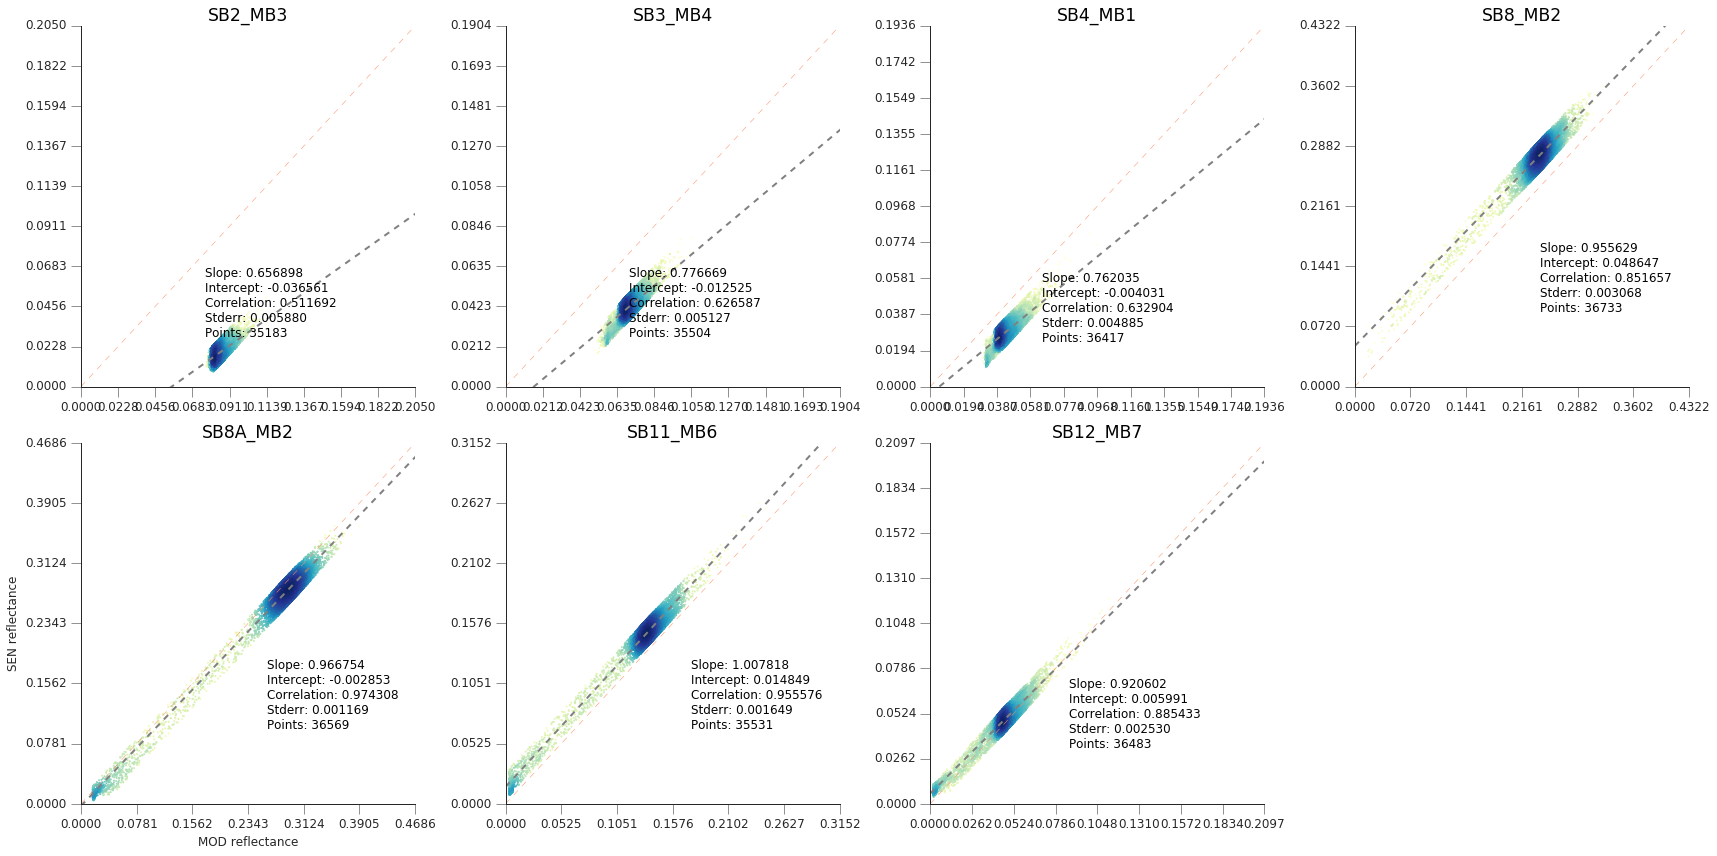

In [27]:
plot_config()
fig = plt.figure()
gs = gridspec.GridSpec(2,4)  # generate a grid space
fig = plt.figure(figsize=(24,12))
names = ('SB2_MB3,SB3_MB4,SB4_MB1,SB8_MB2,SB8A_MB2,SB11_MB6,SB12_MB7').split(',')
cmap = cm.get_cmap('YlGnBu')
psfsolve = []
for i in range(7):
    ax = fig.add_subplot(gs[i])
    m,s = to_reg[i]
    
    mval = np.nanmax([s,m])
    fit = np.polyfit(m,s,1)
    fit_fn = np.poly1d(fit)
    xy = np.vstack([m,s])
    z = gaussian_kde(xy)(xy)
    ax.scatter(m,s, c=z, s=4, edgecolor='',norm=colors.LogNorm(vmin=z.min(), vmax=z.max()*1.2), cmap = cmap)
    ax.plot([0,1],[0.,1], '--',linewidth=0.5)
    ax.plot(np.arange(0,1,0.1), fit_fn(np.arange(0,1,0.1)), '--', color='grey')
    slope,inter, rval, pval, std = r = scipy.stats.linregress(m,s)
    ax.set_title('%s'%names[i])
    ax.text(mval*(4./6.),mval*(1.5/6.),'Slope: %02f \nIntercept: %02f \nCorrelation: %02f \nStderr: %02f \nPoints: %s'%(slope,inter, rval, std, len(m)), 
        )
    pretty_axes(ax)
    ax.set_xlim(0,mval)
    ax.set_ylim(0,mval)
    ax.set_yticks(np.arange(0,mval+0.1,mval/5.))
    ax.set_xticks(np.arange(0,mval+0.1,mval/5.))
    if i==4:
        ax.set_xlabel ( "MOD reflectance")
        ax.set_ylabel ( "SEN reflectance")
    psfsolve.append([slope,inter])
plt.tight_layout()